<a href="http://landlab.github.io"><img style="float: left" src="../../landlab_header.png"></a>

# Using the Landlab `FractureGridGenerator` component

*(Greg Tucker, University of Colorado Boulder, July 2021)*


## Introduction

Landlab' `FractureGridGenerator` is a small helper component that generates a grid in which are embedded a set of randomly aligned fractures. A fracture is described by a line of nodes for which the field `fracture_at_node` equals 1. In other words, nodes where `fracture_at_node = 1` contain one or more fractures running through or near them, and nodes where `fracture_at_node = 0` are devoid of fractures. The component was originally written to initialize a cellular automaton model of rock weathering along fracture zones. An example of a gridded fracture network used in this way can be found in [Tucker et al. (2016)](https://doi.org/10.5194/gmd-9-823-2016) Figure 9.

## Simple example with a raster grid



In [1]:
import copy
import numpy as np
import matplotlib as mpl
from landlab import RasterModelGrid, imshow_grid
from landlab.components import FractureGridGenerator

starting on side 0 at (50, 47)
in here x = 50
raw ang 128.734085947
(50, 47)
east 218.734085947
ang 218.734085947
dy=-0.802128288563, dx=-1.0
starting on side 1 at (19, 50)
in here x = 19
raw ang 116.260940352
(19, 50)
n 296.260940352
ang 296.260940352
dy=-1.0, dx=0.493382829967
starting on side 0 at (50, 23)
in here x = 50
raw ang 160.519140141
(50, 23)
east 250.519140141
ang 250.519140141
dy=-1.0, dx=-0.353742667588
starting on side 0 at (50, 12)
in here x = 50
raw ang 69.0194733886
(50, 12)
east 159.019473389
ang 159.019473389
dy=0.383474130054, dx=-1.0
starting on side 2 at (0, 39)
in here x = 0
raw ang 95.2010855555
(0, 39)
w 365.201085556
ang 365.201085556
dy=0.0910262327367, dx=1.0


/Users/gtucker/Dev/Landlab/landlab/landlab/plot/imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


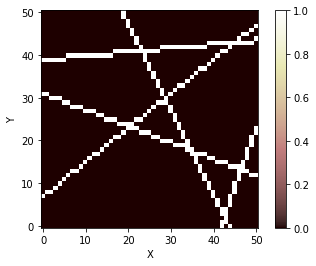

In [2]:
grid = RasterModelGrid((51, 51))
fg = FractureGridGenerator(grid, frac_spacing=20)
fg.run_one_step()
cmap = copy.copy(mpl.cm.get_cmap("pink"))
imshow_grid(grid, grid.at_node['fracture_at_node'], cmap=cmap)

## Example with a hex grid

In [3]:
from landlab import HexModelGrid

In [4]:
grid = HexModelGrid((21, 21), node_layout='rect')
fg = FractureGridGenerator(grid, frac_spacing=10)
fg.run_one_step()
cmap = copy.copy(mpl.cm.get_cmap("pink"))
imshow_grid(grid, grid.at_node['fracture_at_node'], cmap=cmap)

starting on side 0 at (20, 15)
in here x = 20
raw ang 128.734085947
(20, 15)
east 218.734085947
ang 218.734085947
dy=-0.802128288563, dx=-1.0
starting on side 1 at (19, 20)
in here x = 19
raw ang 116.260940352
(19, 20)
n 296.260940352
ang 296.260940352
dy=-1.0, dx=0.493382829967
starting on side 0 at (20, 6)
in here x = 20
raw ang 10.2083359171
(20, 6)
east 100.208335917
ang 100.208335917
dy=1.0, dx=-0.180078602513


IndexError: index 21 is out of bounds for axis 0 with size 21

In [ ]:
np.cos(5*np.pi/6)



### Comparison with 1D analytical solution


In the next example, we'll set up an effectively 1D domain, and compare it with the known analytical solution. We can produce a quasi-1D grid by giving it just 3 rows, two of which are boundary rows, and setting the status of those boundaries to *closed*.

The expected analytical solution is a parabola:

$$z = \frac{UL^2}{D}\left(\frac{x}{L} - \frac{1}{2}\left[\frac{x}{L}\right]^2\right)$$


## References

Tucker, G. E., Hobley, D. E., Hutton, E., Gasparini, N. M., Istanbulluoglu, E., Adams, J. M., & Nudurupati, S. S. (2016). CellLab-CTS 2015: continuous-time stochastic cellular automaton modeling using Landlab. Geoscientific Model Development, 9(2), 823-839, [https://doi.org/10.5194/gmd-9-823-2016](https://doi.org/10.5194/gmd-9-823-2016).